In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

import yaml
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
#COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 3 shapes
    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)  # anchor side in pixels
    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32
    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100
    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5

Using TensorFlow backend.


In [4]:
class TongueConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

def predict():
    import skimage.io
    from mrcnn import visualize

    # Create models in training mode
    config = TongueConfig()
    config.display()
    model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)
    model_path = model.find_last()

    # Load trained weights (fill in path to trained weights here)
    assert model_path != "", "Provide path to trained weights"
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)

    class_names = ['BG', 'scrach']

    # Load a random image from the images folder'
    #file_names = r'C:\Users\pasonatech\Desktop\car_detection\tensorflow\Mask_RCNN\train_data\pic\000011.jpg' 
    #image = skimage.io.imread(file_names)
    IMAGE_DIR = os.path.join(ROOT_DIR, "test_data")
    file_names = next(os.walk(IMAGE_DIR))[2]
    for file in file_names:
        image = skimage.io.imread(os.path.join(IMAGE_DIR, file))
        img_name='1.jpg'
    # Run detection
        results = model.detect([image], verbose=1)

    # Visualize results
        r = results[0]
        visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'], savefig=True)

W0922 14:36:49.813760 10552 deprecation_wrapper.py:119] From C:\Users\pasonatech\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 14:36:49.838763 10552 deprecation_wrapper.py:119] From C:\Users\pasonatech\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 14:36:49.844760 10552 deprecation_wrapper.py:119] From C:\Users\pasonatech\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 14:36:49.883764 10552 deprecation_wrapper.py:119] From C:\Users\pasonatech\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0922 14:36:49.888798 10552 depreca


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

W0922 14:36:52.949798 10552 deprecation_wrapper.py:119] From C:\Users\pasonatech\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0922 14:36:53.432788 10552 deprecation_wrapper.py:119] From C:\Users\pasonatech\Desktop\car_detection\tensorflow\Mask_RCNN\mrcnn\model.py:341: The name tf.log is deprecated. Please use tf.math.log instead.

W0922 14:36:53.445790 10552 deprecation.py:323] From C:\Users\pasonatech\Desktop\car_detection\tensorflow\Mask_RCNN\mrcnn\model.py:399: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0922 14:36:53.452789 10552 deprecation.py:506] From C:\Users\pasonatech\Desktop\car_detection\tensorflow\Mask_RCNN\mrcnn\model.py:423: calling crop_and_resiz

Loading weights from  C:\Users\pasonatech\Desktop\car_detection\tensorflow\Mask_RCNN\logs\shapes20190922T1141\mask_rcnn_shapes_0002.h5
Re-starting from epoch 2
Processing 1 images
image                    shape: (866, 1300, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1300.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -2.12964  max:    2.87866  float32


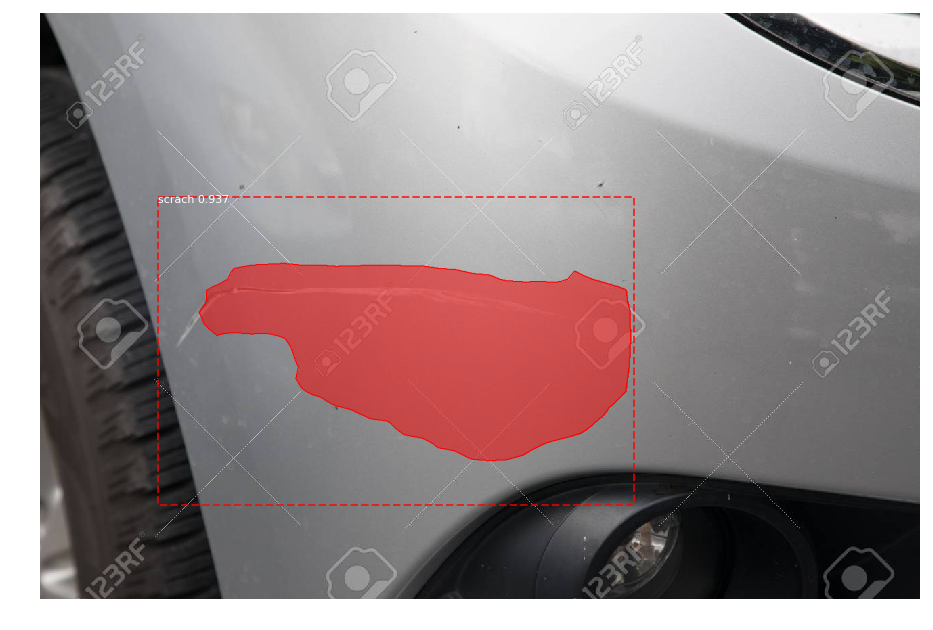

Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -2.12964  max:    2.87866  float32


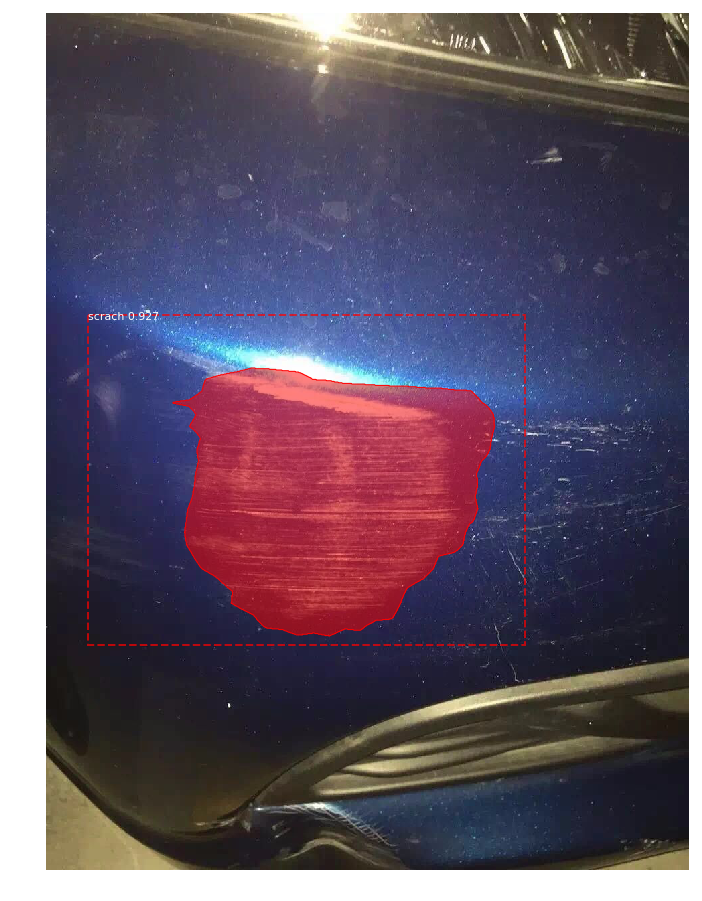

Processing 1 images
image                    shape: (300, 400, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  400.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -2.12964  max:    2.87866  float32


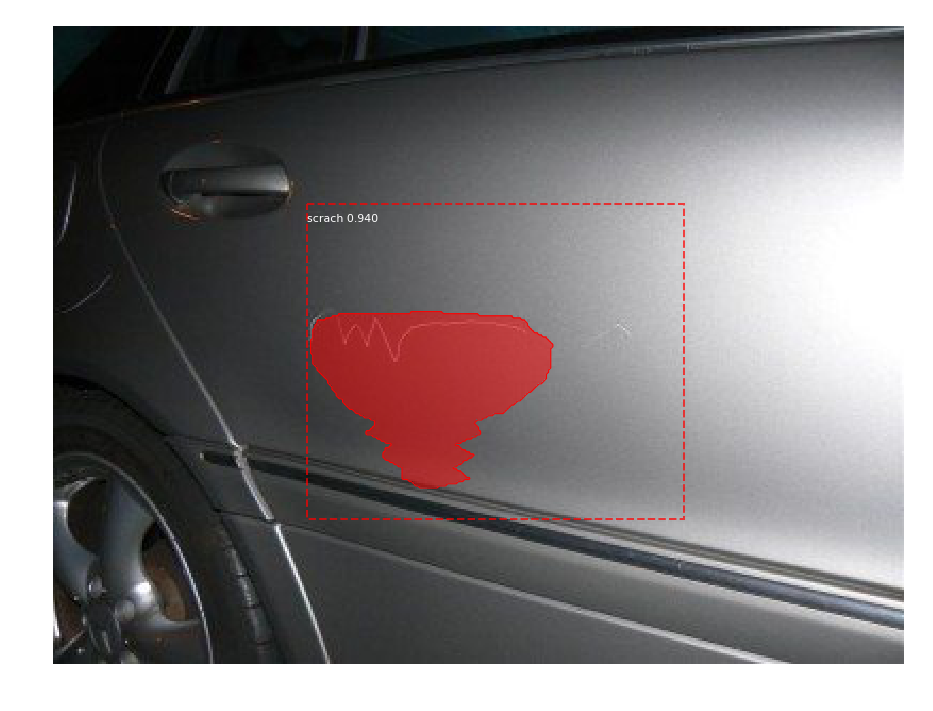

Processing 1 images
image                    shape: (537, 720, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  720.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -2.12964  max:    2.87866  float32


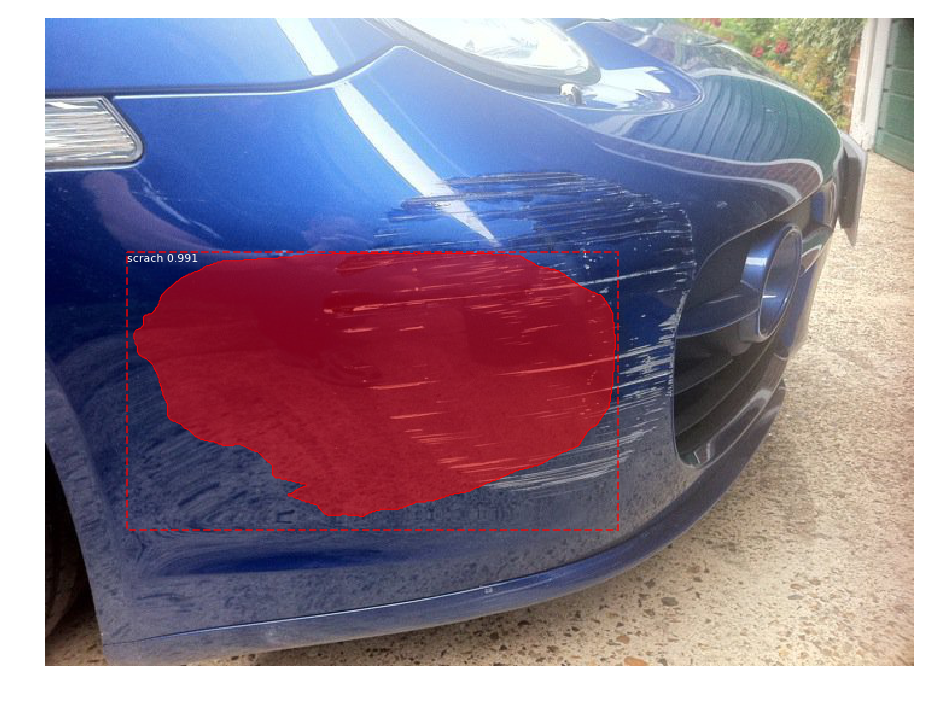

In [3]:
predict()